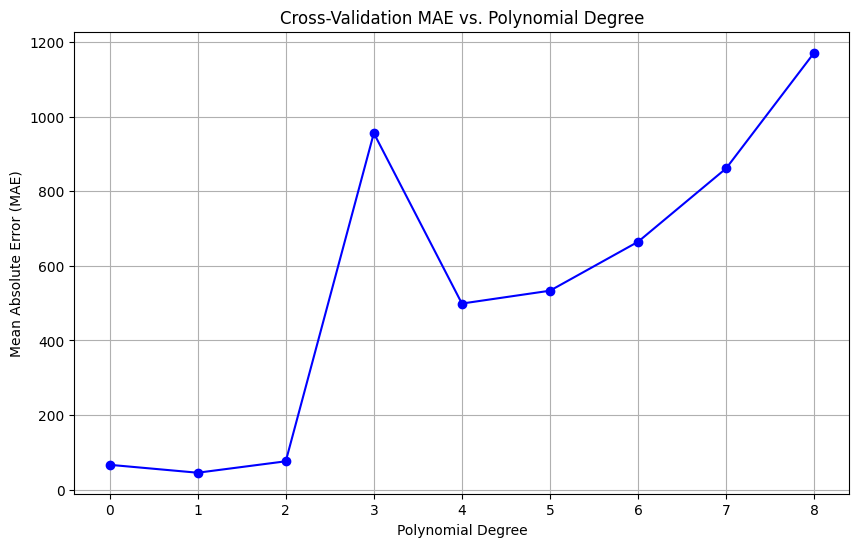

Best Polynomial Degree: 1


In [12]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import make_scorer, mean_absolute_error,mean_absolute_percentage_error
import matplotlib.pyplot as plt

X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



mae_scores = []
mape_scores = []
r_squared_scores = []

for degree in range(0,9):
    poly_features = PolynomialFeatures(degree=degree)
    
    X_train_poly = poly_features.fit_transform(X_train)
    
    model = LinearRegression()
    
    mae = cross_val_score(model, X_train_poly, y_train, cv=5, scoring=make_scorer(mean_absolute_error))
    r_squared = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')
    mape = cross_val_score(model, X_train_poly, y_train, cv=5, scoring=make_scorer(mean_absolute_percentage_error))


    
    mae_scores.append(np.mean(mae))
    r_squared_scores.append(np.mean(r_squared))
    mape_scores.append(np.mean(mape))

degrees = list(range(0,9)) 

plt.figure(figsize=(10, 6))
plt.plot(degrees, mae_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Cross-Validation MAE vs. Polynomial Degree')
plt.grid(True)
plt.show()



best_degree = degrees[np.argmin(mae_scores)]
print(f"Best Polynomial Degree: {best_degree}")






In [13]:
from prettytable import PrettyTable
mean_r_squared = [f'{np.mean(r_squared_scores):.2f} ± {np.std(r_squared_scores):.2f}']
mean_mae = [f'{np.mean(mae_scores):.2f} ± {np.std(mae_scores):.2f}']
mean_mape = f'{np.mean(mape_scores):.2f} ± {np.std(mape_scores):.2f}'


# Create the table using PrettyTable
table = PrettyTable()
table.field_names = ["Polynomial Degree", "R-squared (R²)", "MAE", "MAPE"]
for degree, r_squared, mae, mape in zip(degrees, r_squared_scores, mae_scores, mape_scores):
    table.add_row([degree, f'{r_squared:.2f}', f'{mae:.2f}', f'{mape:.2f}'])

# Add rows for mean and standard deviation
table.add_row(["Mean ± Std", mean_r_squared[0], mean_mae[0], mean_mape[0]])

# Print the table
print(table)

+-------------------+-------------------+-----------------+------+
| Polynomial Degree |   R-squared (R²)  |       MAE       | MAPE |
+-------------------+-------------------+-----------------+------+
|         0         |       -0.03       |      66.76      | 0.63 |
|         1         |        0.45       |      45.54      | 0.41 |
|         2         |       -0.76       |      76.16      | 0.65 |
|         3         |      -1067.96     |      955.58     | 6.76 |
|         4         |      -205.00      |      498.90     | 3.90 |
|         5         |      -341.06      |      533.34     | 4.03 |
|         6         |      -752.57      |      664.42     | 5.08 |
|         7         |      -1604.96     |      861.07     | 6.51 |
|         8         |      -3668.45     |     1171.09     | 8.76 |
|     Mean ± Std    | -848.93 ± 1126.08 | 541.43 ± 390.85 |  4   |
+-------------------+-------------------+-----------------+------+




Given the table you provided, the best model based on R² and MAE is the one with a polynomial degree of 1 (constant model):

Polynomial Degree: 1
R-squared (R²): 0.45       
MAE: 45.54332900504238
MAPE: 0.41

This model has the highest R² value (0.45) among the polynomial degrees and also has the lowest MAE (45.5433). The R² value is positive, indicating a better fit than the models with negative R² values. Additionally, it has a lower MAE compared to the other models, signifying better accuracy in predicting the target variable.

However, it's important to note that this is a simplistic evaluation based on the provided metrics. In a real-world scenario, it's advisable to perform additional evaluations and possibly consider other factors before finalizing the model, such as cross-validation and domain-specific knowledge.

In [14]:
print("Additional Analysis and Insights:\n")
negative_r2_degrees = [degree for degree, r2 in zip(degrees, r_squared_scores) if r2 < 0]

if best_degree == 1:
    print("The chosen model (degree 1) represents a constant value and assumes no relationship between input features and the target variable.")
    print("This model may be suitable if the data exhibits no apparent linear or polynomial patterns.")
    print("It can be useful when the target variable doesn't depend significantly on the input features.")
    
if len(negative_r2_degrees) > 1:
    print("\n \n")
    print("In cases with outliers or complex relationships, a constant model may not perform well.")
    print("It's a simplistic model and may not capture variations in the data effectively.")
    
print("\n \n")
print("To decide whether a constant model is appropriate, data exploration and domain knowledge are crucial.")
print("Consider investigating the relationships in the data and understanding the problem domain before finalizing the model choice.")


Additional Analysis and Insights:

The chosen model (degree 1) represents a constant value and assumes no relationship between input features and the target variable.
This model may be suitable if the data exhibits no apparent linear or polynomial patterns.
It can be useful when the target variable doesn't depend significantly on the input features.

 

In cases with outliers or complex relationships, a constant model may not perform well.
It's a simplistic model and may not capture variations in the data effectively.

 

To decide whether a constant model is appropriate, data exploration and domain knowledge are crucial.
Consider investigating the relationships in the data and understanding the problem domain before finalizing the model choice.
